In [31]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress

In [9]:
# reading in the new csv_file 

spotify_df = pd.read_csv(Path("../Resources/spotify-2023_updated.csv"))
spotify_df.head()

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_charts,streams,in_apple_charts,bpm,mode,danceability_pct,valence_pct,energy_pct,acousticness_pct,instrumentalness_pct,liveness_pct,speechiness_pct
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,147,141381703,263,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,48,133716286,126,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,113,140003974,207,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,100,800840817,207,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,50,303236322,133,144,Minor,65,23,80,14,63,11,6


In [22]:
# renaming columns

spotify_df.columns = spotify_df.columns.str.replace("_", " ")
spotify_df.columns = spotify_df.columns.str.title()

spotify_df = spotify_df.rename(columns={"In Spotify Charts": "Spotify Chart Rank",
                                       "In Apple Charts": "Apple Chart Rank",
                                       "Bpm": "BPM"})

spotify_df.head()

,Track Name,Artist Name,Artist Count,Released Year,Released Month,Released Day,Spotify Chart Rank,Streams,Apple Chart Rank,BPM,Mode,Danceability Pct,Valence Pct,Energy Pct,Acousticness Pct,Instrumentalness Pct,Liveness Pct,Speechiness Pct
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,147,141381703,263,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,48,133716286,126,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,113,140003974,207,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,100,800840817,207,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,50,303236322,133,144,Minor,65,23,80,14,63,11,6


In [136]:
def filter_by_artist(artist_name):
    # Sorting the DataFrame by "Streams" in descending order
    sorted_df = spotify_df.sort_values(by="Streams", ascending=False)[["Streams", "Track Name", "Artist Name"]]
    
    # Filtering rows where "Artist Name" contains the specified artist name
    filtered_df = sorted_df[sorted_df["Artist Name"].str.contains(artist_name, case=False)]
    
    return filtered_df

filter_by_artist("Morgan Wallen")

,Streams,Track Name,Artist Name
28,429829812,Last Night,Morgan Wallen
316,367814306,You Proof,Morgan Wallen
357,203221468,Thought You Should Know,Morgan Wallen
334,148469433,One Thing At A Time,Morgan Wallen
337,125917280,ThinkinяПНяПНяПН B,Morgan Wallen
339,95623148,Everything I Love,Morgan Wallen
336,88791109,AinяПНяПНяПНt Tha,Morgan Wallen
343,83021468,I Wrote The Book,Morgan Wallen
347,58890931,Man Made A Bar (feat. Eric Church),"Morgan Wallen, Eric Church"
355,56533272,яПНяПНяПН98 Braves,Morgan Wallen


***BAR: ARTIST COUNT VS STREAMS, KEY VS STREAMS***

***BOXPLOTS: GROUPING STREAMS INTO CATEGORIES OF FOUR THEN PLOT AGAINST FACTORS***

In [74]:
# Defining a function to make scatter plots and calculate linear regressions

def scatter_plot(x, y, x_value, y_value): 
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    regress = x * slope + intercept

    plt.scatter(x, y, edgecolors="black")
    plt.plot(x, regress, color='red')
    plt.title(f"{str(x.name)} vs. {str(y.name)}")
    plt.xlabel(str(x.name) + " (per billion)")
    plt.ylabel(str(y.name))
    plt.ylim(0, 100)
    plt.annotate(f"r = {round(rvalue,3)}",(x_value, y_value),fontsize=15,color="red")

    plt.savefig(Path(f"../Images/Scatter Plots/{str(x.name)} vs. {str(y.name)}.png"))
    plt.show()

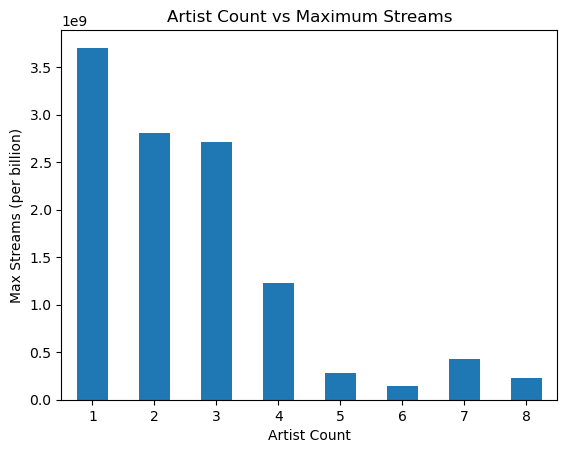

In [170]:
# creating a bar chart on artist count vs streams

artist_count_vs_streams = spotify_df.groupby("Artist Count").max()["Streams"]
artist_count_vs_streams.plot(kind="bar")
plt.title("Artist Count vs Maximum Streams")
plt.xticks(rotation="horizontal")
plt.ylabel("Max Streams (per billion)")
plt.savefig(Path(f"../Images/Bar Plots/Artist Count vs Maximum Streams.png"))

plt.show()


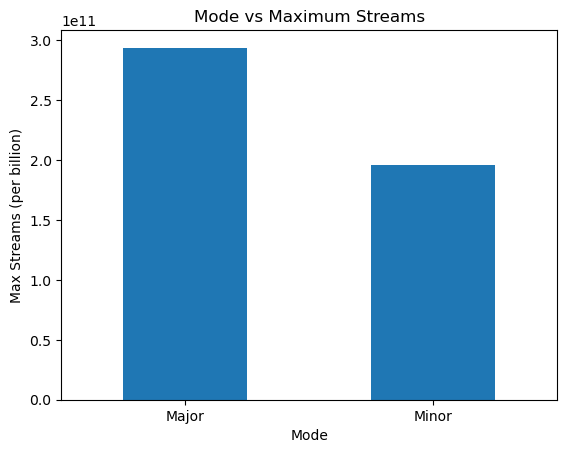

In [171]:
# creating a bar chart on mode vs streams
spotify_df["Mode"].value_counts()

mode_vs_streams = spotify_df.groupby("Mode").sum()["Streams"]

mode_vs_streams.plot(kind="bar")
plt.title("Mode vs Maximum Streams")
plt.xticks(rotation="horizontal")
plt.ylabel("Max Streams (per billion)")
plt.savefig(Path(f"../Images/Bar Plots/Mode vs Maximum Streams.png"))

plt.show()

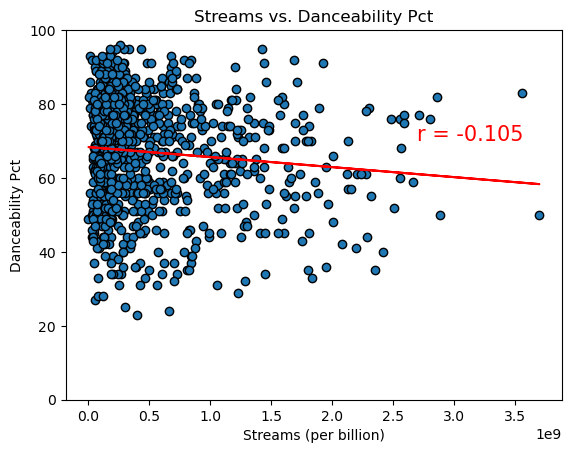

In [75]:
# making a scatter plot comparing danceability and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Danceability Pct"], 2700000000, 70)

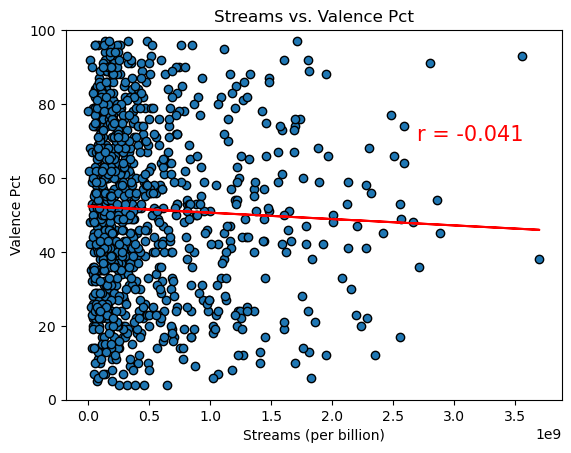

In [76]:
# making a scatter plot comparing valence and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Valence Pct"], 2700000000, 70)


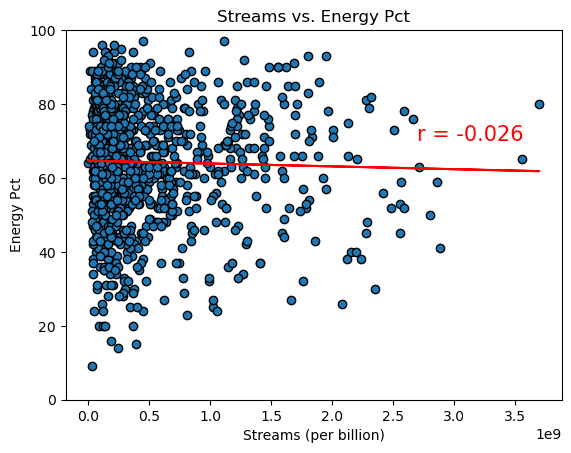

In [77]:
# making a scatter plot comparing energy and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Energy Pct"], 2700000000, 70)

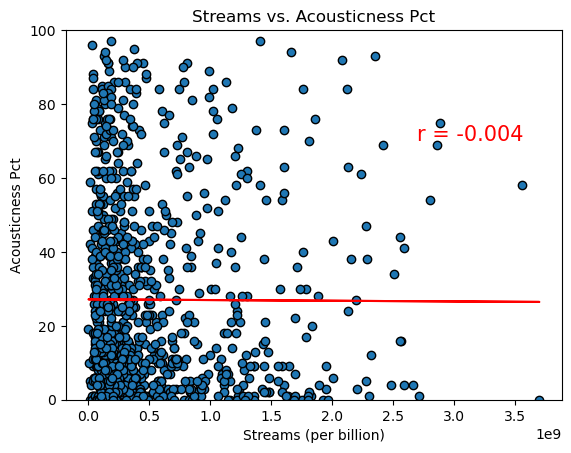

In [78]:
# making a scatter plot comparing acousticness and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Acousticness Pct"], 2700000000, 70)

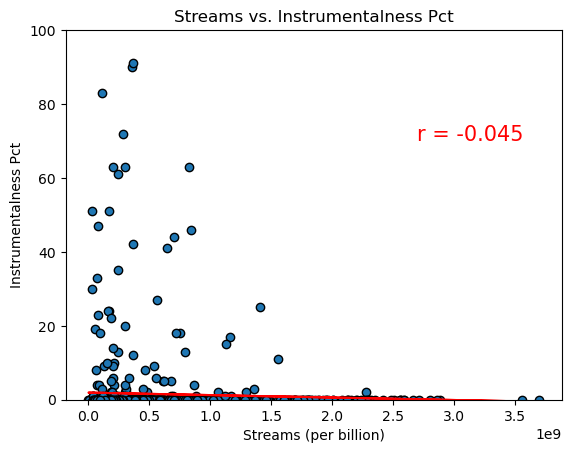

In [79]:
# making a scatter plot comparing instrumentalness and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Instrumentalness Pct"], 2700000000, 70)

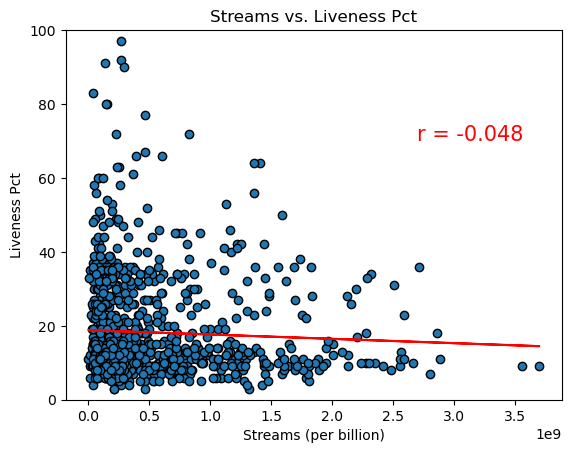

In [81]:
# making a scatter plot comparing liveness and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Liveness Pct"], 2700000000, 70)

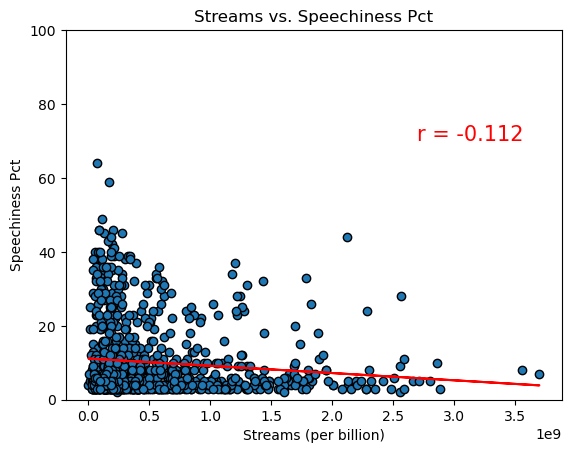

In [82]:
# making a scatter plot comparing speechiness and streams 
scatter_plot(spotify_df["Streams"], spotify_df["Speechiness Pct"], 2700000000, 70)